In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#用datareader讀入股價資料
import pandas_datareader.data as web

#讀入迴歸分析套件
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

D:\python\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
df = web.DataReader("GOOG", "yahoo")

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-08,534.119995,526.239990,533.309998,526.830017,1520600,526.830017
2015-06-09,529.200012,523.010010,527.559998,526.690002,1455300,526.690002
2015-06-10,538.359985,529.349976,529.359985,536.690002,1815000,536.690002
2015-06-11,538.979980,533.020020,538.424988,534.609985,1217500,534.609985
2015-06-12,533.119995,530.159973,531.599976,532.330017,955800,532.330017
...,...,...,...,...,...,...
2020-06-01,1437.959961,1418.000000,1418.390015,1431.819946,1217100,1431.819946
2020-06-02,1439.609985,1418.829956,1430.550049,1439.219971,1278100,1439.219971
2020-06-03,1446.552002,1429.776978,1438.300049,1436.380005,1256200,1436.380005


In [7]:
close = np.array(df["Adj Close"])

In [10]:
#以25天作為一個月的基準
X = close[:close.shape[0]-25]
Y = close[25:]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [12]:
x_train = x_train.reshape(x_train.shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], 1)

In [13]:
regr = LinearRegression()

In [14]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

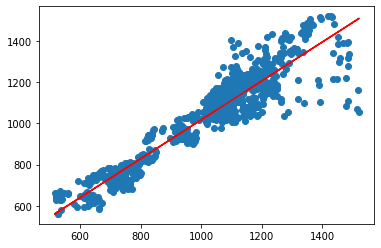

In [16]:
#查看訓練資料與迴歸模型的關係
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), c = 'r')

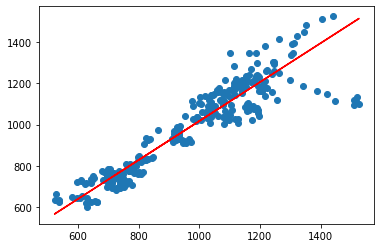

In [17]:
#查看測試資料與迴歸模型的關係
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), c = 'r')